## Group No 112

## Group Member Names:
1. Puneeth L
2. Ritesh Kumar
3. Lenkala Midhun Reddy
4. JEBIN K KOSHY

## Journal used for the implemetation
Journal title:umonia Detection using Chest X-ray Images
using CNN Algorithm

Authors:Surya Deepta Mazumda Ashish Kumar R. Sethuraman

Journal Name: IEEE Xplore

Year:2023

# 1. Import the required libraries

In [38]:
##---------Type the code below this line------------------##

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Conv2D, MaxPool2D, Flatten, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.model_selection import train_test_split


# 2. Data Acquisition
 
For the problem identified by you, students have to find the data source themselves from any data source.

Provide the URL of the data used.

Write Code for converting the above downloaded data into a form suitable for DL



In [39]:
##---------Type the code below this line------------------##

#URL for Data Set and downloded to local copy
#https://data.mendeley.com/datasets/rscbjbr9sj/2

mainDIR = "C:\\Users\\punee\\BITS_PYTHON\\DeepLearning\\BITS_Assignment\\assig2\\ChestXRay2017\\chest_xray"


# 3. Data Preparation

Perform the data prepracessing that is required for the data that you have downloaded. 


This stage depends on the dataset that is used. 

In [40]:
##---------Type the code below this line------------------##

## Split the data into training set and testing set
##---------Type the code below this line------------------##

## Identify the target variables.
##---------Type the code below this line------------------##


train_folder = mainDIR + "\\train"
val_folder =  mainDIR + "\\val"
test_folder = mainDIR + "\\test"



datagen_train = ImageDataGenerator(rescale = 1./255, #1/255 to scale/normalize the pixel values
                                   shear_range = 0.2, #shear intensity
                                   rotation_range = 5, #random rotation (0 to 100 degrees)
                                   zoom_range = 0.2, #random zooming
                                   width_shift_range=0.1,  #random horizontal shifting
                                   height_shift_range=0.1)  #random vertical shifting 


training_set = datagen_train.flow_from_directory(train_folder,
                                                 target_size = (300, 300),
                                                 batch_size = 32,
                                                 shuffle = True,
                                                 seed = 823,
                                                 color_mode = 'grayscale',
                                                 class_mode = 'binary')


datagen_val = ImageDataGenerator(rescale = 1./255)
val_set = datagen_val.flow_from_directory(val_folder,
                                            target_size = (300, 300),
                                            batch_size = 32,
                                            shuffle = True,
                                            seed = 823,
                                            color_mode = 'grayscale',
                                            class_mode = 'binary')

datagen_test = ImageDataGenerator(rescale = 1./255)
test_set = datagen_test.flow_from_directory(test_folder,
                                            target_size = (300, 300),
                                            batch_size = 52,
                                            shuffle = False,
                                            seed = 823,
                                            color_mode = 'grayscale',
                                            class_mode = 'binary')



Found 5232 images belonging to 2 classes.
Found 12 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


## 4. Deep Neural Network Architecture


## 4.1 Design the architecture that you will be using

* CNN / RNN / Transformer as per the journal referenced



In [44]:
np.random.seed(823)
tf.random.set_seed(188)

#Initialize
cnn = tf.keras.models.Sequential()

#First Convolutional Layer
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[300, 300, 1]))
cnn.add(MaxPool2D(pool_size=2, strides=2))


#Second Convolutional Layer
cnn.add(Conv2D(filters = 64, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))
cnn.add(Dropout(0.2))

#Third Convolutional Layer
cnn.add(Conv2D(filters = 128, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

#Flatten Layer
cnn.add(Flatten())

#Full Connection
cnn.add(Dense(units=256, activation='relu'))
cnn.add(Dropout(0.1))

#Output Layer
cnn.add(Dense(units=1, activation='sigmoid'))

#Compile
cnn.compile(optimizer = 'adam', 
            loss = 'binary_crossentropy', 
            metrics = ['accuracy'])



## 4.2 DNN Report

Report the following and provide justification for the same.

* Number of layers
* Number of units in each layer
* Total number of trainable parameters 



In [45]:
#Summary
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 298, 298, 32)      320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 149, 149, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 73, 73, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 71, 71, 128)      

# 5. Training the model 


In [46]:
# Configure the training, by using appropriate optimizers, regularizations and loss functions
##---------Type the code below this line------------------##


cnn_model = cnn.fit(x = training_set, validation_data = val_set, epochs = 15, shuffle = False)



Epoch 1/15
164/164 [==============================] - 569s 3s/step - loss: 0.5748 - accuracy: 0.7825 - val_loss: 0.5187 - val_accuracy: 0.5833
Epoch 2/15
164/164 [==============================] - 585s 4s/step - loss: 0.2918 - accuracy: 0.8796 - val_loss: 0.5528 - val_accuracy: 0.7500
Epoch 3/15
164/164 [==============================] - 568s 3s/step - loss: 0.2362 - accuracy: 0.9073 - val_loss: 0.4579 - val_accuracy: 0.7500
Epoch 4/15
164/164 [==============================] - 526s 3s/step - loss: 0.2438 - accuracy: 0.9050 - val_loss: 0.2547 - val_accuracy: 0.9167
Epoch 5/15
164/164 [==============================] - 514s 3s/step - loss: 0.2141 - accuracy: 0.9148 - val_loss: 0.5444 - val_accuracy: 0.7500
Epoch 6/15
164/164 [==============================] - 510s 3s/step - loss: 0.2012 - accuracy: 0.9213 - val_loss: 0.3535 - val_accuracy: 0.7500
Epoch 7/15
164/164 [==============================] - 507s 3s/step - loss: 0.1809 - accuracy: 0.9335 - val_loss: 0.4137 - val_accuracy: 0.7500

# 6. Test the model


In [47]:
##---------Type the code below this line------------------##

test_set.reset()
predictions_test = (cnn.predict(test_set,verbose=True) > 0.5).astype("int32")

test_loss, test_accuracy = cnn.evaluate(test_set)

12/12 [==============================] - 13s 1s/step - loss: 0.3890 - accuracy: 0.8638


# 7. Report the result

1. Plot the training and validation accuracy history.
2. Plot the training and validation loss history. 
3. Report the testing accuracy and loss.
4. Show Confusion Matrix for testing dataset.
5. Report values for preformance study metrics like accuracy, precision, recall, F1 Score.


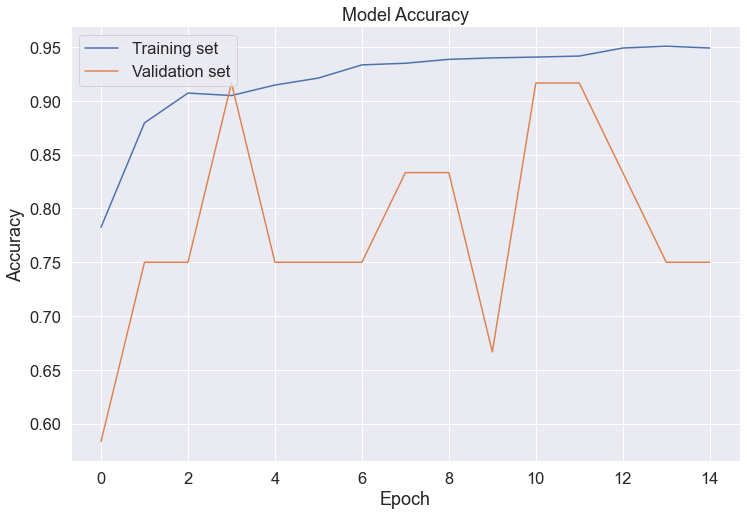

In [48]:
##---------Type the code below this line------------------##


# Accuracy 
plt.plot(cnn_model.history['accuracy'])
plt.plot(cnn_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()


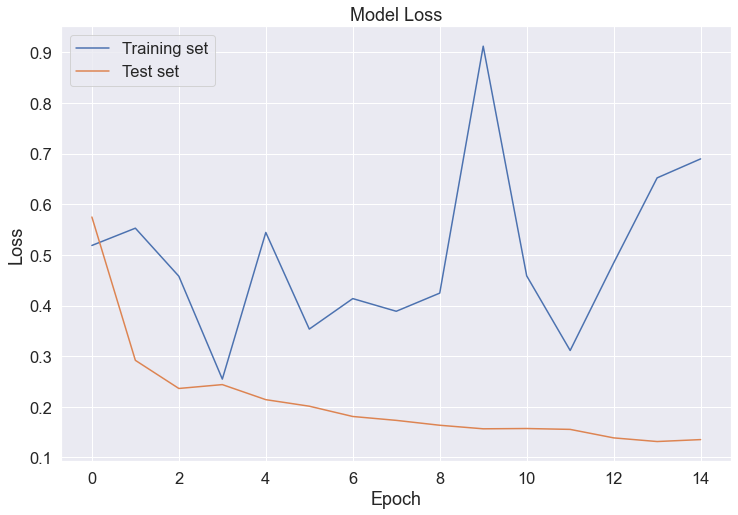

In [49]:
# Loss 
plt.plot(cnn_model.history['val_loss'])
plt.plot(cnn_model.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()

In [50]:
print(f"Testing Accuracy: {test_accuracy}")
print(f"Testing Loss: {test_loss}")



Testing Accuracy: 0.8637820482254028
Testing Loss: 0.38899171352386475


In [51]:
labels = (training_set.class_indices)
labels = dict((i,j) for j,i in labels.items())
print(labels)

{0: 'NORMAL', 1: 'PNEUMONIA'}


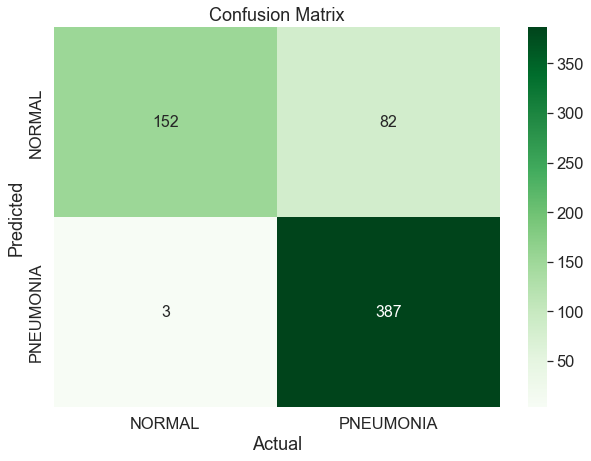

In [52]:
from sklearn.metrics import classification_report,confusion_matrix
y_true = np.array([0] * 234 + [1] * 390) #234 Normal, #390 Pneumonia
data = confusion_matrix(y_true, predictions_test)
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Predicted'
df_cm.columns.name = 'Actual'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.5)
ax = sns.heatmap(df_cm,cmap = 'Greens', annot=True,fmt = '.5g',annot_kws={"size": 16})
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['NORMAL', 'PNEUMONIA']); ax.yaxis.set_ticklabels(['NORMAL', 'PNEUMONIA']);



In [53]:
print("Classification Report: ")
print(classification_report(y_true,predictions_test))

Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.65      0.78       234
           1       0.83      0.99      0.90       390

    accuracy                           0.86       624
   macro avg       0.90      0.82      0.84       624
weighted avg       0.88      0.86      0.86       624



### NOTE


All Late Submissions will incur a <b>penalty of -2 marks </b>. So submit your assignments on time.

Good Luck